# Regularization in Relation to Overfitting

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge

Last Update 10/21/2021

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

np.set_printoptions(precision=5)

# Regularization

In our previous notebook on basis function regression we encountered the issue of overfitting, which occurred when we used monomials of a degree that is too high:



RMSE for Polynomial Regression:  0.027


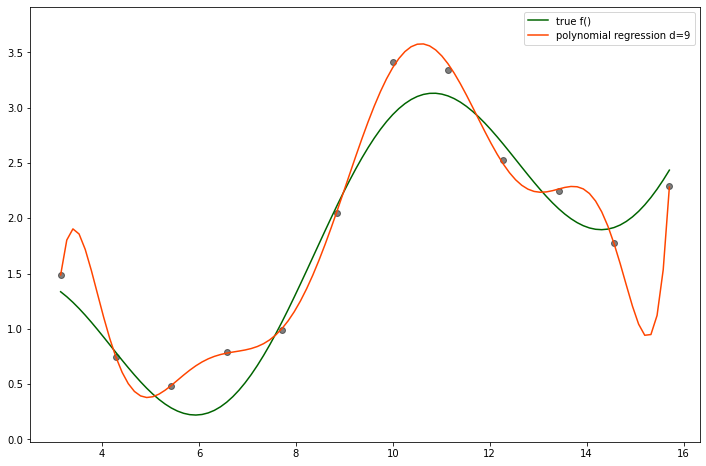

In [2]:
N = 12
x_low = np.pi
x_del = 4 * np.pi
x_high = x_low + x_del
mw = 0.2
mb = 0.0
noise_sigma = 0.3
#omega = 2.0
omega = 0.75

rseed = 42
#degree = 9
degree = 9

def true_f(x) :
    return np.sin(omega * x) + mw * x + mb

lr_model = make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression())


rng = np.random.RandomState(rseed)
x_train = np.linspace(x_low, x_high, N)
#x = x_low + rng.rand(N) * x_del
y_train = true_f(x_train) + noise_sigma * rng.randn(N)
lr_model.fit(x_train[:, np.newaxis], y_train)

yfit_train = lr_model.predict(x_train[:, np.newaxis])
rmse = mean_squared_error(y_train, yfit_train, squared=False)
print(f'RMSE for Polynomial Regression: {rmse:6.3f}')

xfit_100 = np.linspace(x_low, x_high, 100)
yfit_100 = lr_model.predict(xfit_100[:, np.newaxis])

plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.5, color='black')
plt.ylim(np.min(y_train)-0.5, np.max(y_train)+0.5)
plt.plot(xfit_100, true_f(xfit_100), label='true f()', color='darkgreen')
plt.plot(xfit_100, yfit_100, label='polynomial regression d=9', color='orangered')
plt.legend();

### Ridge regression ($L_2$ regularization)

Regularization is the way to address overfitting in machine learning.
The idea is to add some information that would prevent the model from overfitting.
There are many ways to implement this idea.
In the context of linear regression we do so by adding another term to our mean-square-error.  Our orginal loss function

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N(y_i - \mathbf{w}^\top \mathbf{x}_i)^2 
$$

is replaced by a regularized version that adds another term to the loss function:

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 + \alpha \,||\mathbf{w}||^2.
$$

Here, $\alpha>0$ is a parameter that controls the trade-off between fitting and regularization.
The regularizer $\mathbf{w}^\top \mathbf{w}$ is known as the $L_2$ regularizer.  Linear regression with the $L_2$ regularizer is known as *ridge regression*.

This regularizer encourages the parameters $\mathbf{w}$ to be small: the regularization term $\Omega(\mathbf{w}) = \alpha\, ||\mathbf{w}||^2$ is minimized when $\mathbf{w} = \mathbf{0}$. This counteracts what the loss term tries to do which is to have the model fit the data as closely as possible.  As we see next, the effect of the regularization term is to encourage a smoother solution.

Let's illustrate that using scikit-learn:



Training RMSE for Polynomial Regression:  0.027
Training RMSE for Regularized Polynomial Regression:  0.200

Testing  RMSE for Polynomial Regression:  0.639
Testing  RMSE for Regularized Polynomial Regression:  0.288


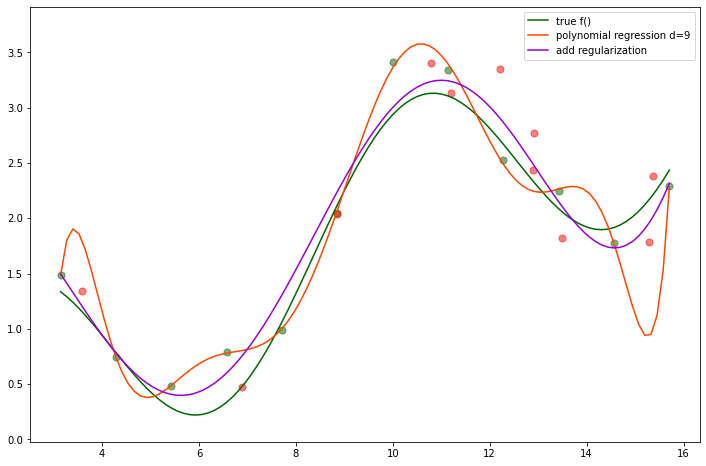

In [3]:
from sklearn.linear_model import Ridge

rseed = 42
rng = np.random.RandomState(rseed)
x_train = np.linspace(x_low, x_high, N)
y_train = true_f(x_train) + noise_sigma * rng.randn(N)

rseed = 13
rng = np.random.RandomState(rseed)
x_test = x_low + rng.rand(N) * x_del
y_test = true_f(x_test) + noise_sigma * rng.randn(N)

#alpha = 100000
# alpha_val = 0.0000001
alpha_val = 1e-7

ridge_model = make_pipeline(PolynomialFeatures(degree), 
                            Ridge(alpha=alpha_val,normalize=True))

ridge_model.fit(x_train[:, np.newaxis], y_train)

yfit_train = lr_model.predict(x_train[:, np.newaxis])
yfit_test  = lr_model.predict(x_test[:, np.newaxis])

yfit_train_reg = ridge_model.predict(x_train[:, np.newaxis])
yfit_test_reg  = ridge_model.predict(x_test[:, np.newaxis])

rmse_train = mean_squared_error(y_train, yfit_train, squared=False)
rmse_train_reg = mean_squared_error(y_train, yfit_train_reg, squared=False)
print(f'\nTraining RMSE for Polynomial Regression: {rmse_train:6.3f}')
print(f'Training RMSE for Regularized Polynomial Regression: {rmse_train_reg:6.3f}')

rmse_test = mean_squared_error(y_test, yfit_test, squared=False)
rmse_test_reg = mean_squared_error(y_test, yfit_test_reg, squared=False)
print(f'\nTesting  RMSE for Polynomial Regression: {rmse_test:6.3f}')
print(f'Testing  RMSE for Regularized Polynomial Regression: {rmse_test_reg:6.3f}')

xfit_100 = np.linspace(x_low, x_high, 100)
yfit_100 = lr_model.predict(xfit_100[:, np.newaxis])
yfit_100_reg = ridge_model.predict(xfit_100[:, np.newaxis])

plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.5, color='darkgreen', s=50)
plt.scatter(x_test, y_test, alpha=0.5, color='red', s = 50)
plt.ylim(np.min(y_train)-0.5, np.max(y_train)+0.5)
plt.plot(xfit_100, true_f(xfit_100), label = 'true f()', color='darkgreen');
plt.plot(xfit_100, yfit_100, label = 'polynomial regression d=9', color='orangered');
plt.plot(xfit_100, yfit_100_reg, label = 'add regularization', color='darkviolet');
plt.legend()
pass

It is hard to avoid details, and here is a good example. Note the use of `normalize=True` when setting up the `Ridge` regression part of the pipeline.  Turns out this choice makes a huge difference for this example, and so this parameter selection choice is favored.

Short answer as to why is that adding normalization corrects for issues arising when higher order powers become vastly larger in magnitude than lower order terms. If you want to know more, review [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Because we used ridge regression we expect our coefficients on the whole to be smaller. Let us see how much smaller by dividing the ridge regression coeficients by the corresponding normal polynomial regression parameters. 

Let us start by using what we know about correlation to address the question of similarity. Let us compute the Pearson product-moment correlation coefficient - correlation for short - between the regression coefficients with and without regularization. 

In [4]:
ridge_coefs = ridge_model.get_params()['ridge'].coef_
norml_coefs = lr_model.get_params()['linearregression'].coef_
foo = np.round(np.corrcoef(ridge_coefs, norml_coefs)[0,1],3)
print(f'The Correleation is: {foo:1.3f}')

The Correleation is: 0.987


Let us also use this oportunity to practice what we talked about earlier in terms of thinking through what it means to say that two vectors are correlated.  In particular, let us create vectors $A$ and $B$ which are the original coefficents after subtracting their respective means and dividing by their respective sample standard deviations (their magnitudes). 

First, as it must be, the dot product of the normalized vectors yields exactly the same correlation score as the call to ``nmp.corrcoef``

In [5]:
Av1 = ridge_coefs - np.mean(ridge_coefs)
Bv1 = norml_coefs - np.mean(norml_coefs)
Av2 = Av1 / np.linalg.norm(Av1)
Bv2 = Bv1 / np.linalg.norm(Bv1)
print(f'The Correleation is: {Av2 @ Bv2:1.3f}')

The Correleation is: 0.987


We can go one step further with a simple visual aid - let us plot the corresponding entries in the two normalized vectors in proportion to each other and see what the movement of one predicts about the movement (placement) of the other.

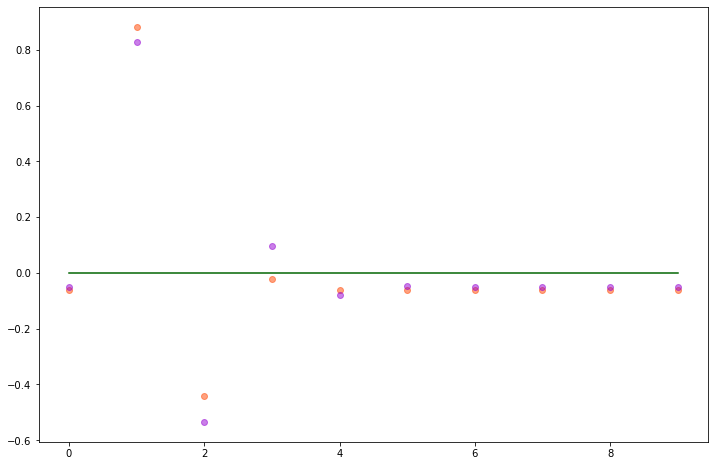

In [6]:
plt.figure(figsize=(12, 8))
plt.plot([0,9],[0,0], color='darkgreen')
plt.scatter(np.arange(0,Av2.shape[0]), Av2, alpha=0.5, color='orangered')
plt.scatter(np.arange(0,Bv2.shape[0]), Bv2, alpha=0.5, color='darkviolet')

So far you could be forgiven thinking that there really is not much difference.  But let us return to the original coeficients themselves and not not how much they differ in overall magnitude of the coeficients themselves.

In [7]:
ridge_coefs = ridge_model.get_params()['ridge'].coef_
norml_coefs = lr_model.get_params()['linearregression'].coef_
ratio_rn = abs(ridge_coefs[1:] / norml_coefs[1:])
print('Ratio normal to regularized by Coefficient')
for i in range(len(ratio_rn)) :
    print(f'For Coeficient {i} the ratio is: {ratio_rn[i]:15.12f}')
print('\nSum of squared coeficients are ...')
print(f'Regularized \t{np.sum(ridge_coefs**2):16.3f}')
print(f'Normal \t\t{np.sum(norml_coefs**2):16.3f}')    

Ratio normal to regularized by Coefficient
For Coeficient 0 the ratio is:  0.001658063645
For Coeficient 1 the ratio is:  0.001219264247
For Coeficient 2 the ratio is:  0.000413424427
For Coeficient 3 the ratio is:  0.000033902893
For Coeficient 4 the ratio is:  0.000066021824
For Coeficient 5 the ratio is:  0.000043148010
For Coeficient 6 the ratio is:  0.000038171989
For Coeficient 7 the ratio is:  0.000201785548
For Coeficient 8 the ratio is:  0.000677352619

Sum of squared coeficients are ...
Regularized 	           5.464
Normal 		     2272079.292


### Hyperparameters vs parameters

The regularization parameter $\alpha$ is different than the parameters $\mathbf{w}$ of our model.  The parameters $\mathbf{w}$ are set as part of the training procedure.  This is not the case for the regularization parameter.  It is called a **hyperparameter**.  Hyperparameters play a special role in Machine Learning and how best to search for good choices is itself a major focus of attention. Do notice that common sense test of whether something is a hyperparameter is to ask yourself is it is adjust during model fitting/training. If this answer is no then that is a good hint your work working with a hyperparameter rather than model parameter.

#### Reflection

* What other methods we already looked at has a hyperparameter?

###  Visualizing the effect of the regularization parameter

Next we will demonstrate the effect of $L_2$ regularization by visualizing the weight vector as a function of the value of the regularization hyperparameter.  Here, we will use ridge regression to solve a the [Breast Cancer Data Set Classification problem](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html):


In [8]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X.shape
classifier = Ridge()

coefs = []
errors = []
alphas = np.logspace(-5, 2, 40)

# Train the model with different values of the regularization parameter:
for a in alphas:
    classifier.set_params(alpha=a)
    classifier.fit(X, y);
    coefs.append(classifier.coef_)
    err = mean_squared_error(y, classifier.predict(X), squared=False)
    errors.append(err)
    
#for i in range(len(alphas)) :
#    print(f'For alpha {alphas[i]:12.6f} rmse is {errors[i]:4.3f}')

The fullowing two plots have aligned horizontal axes and so it becomes easy to see the inverse relationship between the magnitudes of the coeficients - the weights - and the rmse error.

Text(0, 0.5, 'weights')

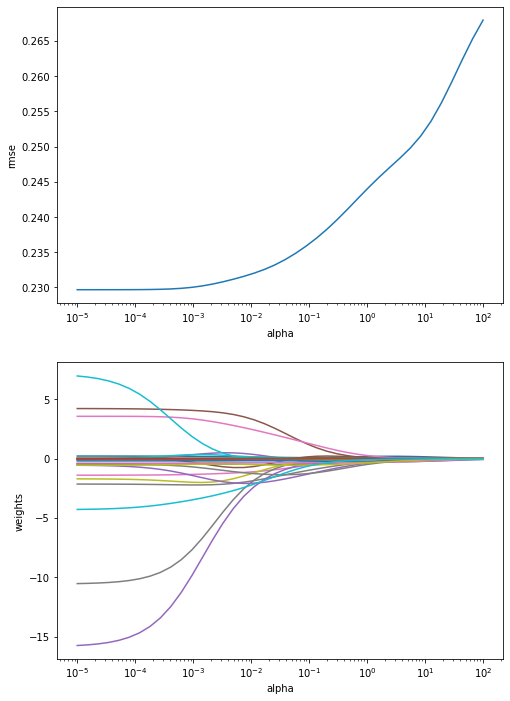

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(12)
fig.set_figwidth(8)

ax1.semilogx(alphas, errors)
ax1.set_xlabel('alpha')
ax1.set_ylabel('rmse')

ax2.semilogx(alphas, coefs)
ax2.set_xlabel('alpha')
ax2.set_ylabel('weights')

**Observations:**

As alpha increases (strong regularization), the coefficients of the trained weight vector decrease, eventually converging to 0, as we would expect.

### The Lasso ($L_1$ regularization)

A common alternative to the $L_2$ penalty is to use the $L_1$ regularizer, also known as the Lasso:

$$
\Omega(\mathbf{w}) = \alpha \, ||\mathbf{w}||_1 = \alpha \sum_{i=1}^d |w_i|.
$$

The Lasso is available in scikit-learn and as [sklearn.linear_model.Lasso](https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html).

Here is the Lasso regularization applied to the same sine plus linear plus noise samples used above:

BRINGING DOWN THE EXAMPLE ABOVE WITH LASSO MOD


Training RMSE for Polynomial Regression:  0.027
Training RMSE for Regularized Polynomial Regression:  0.390

Testing  RMSE for Polynomial Regression:  0.639
Testing  RMSE for Regularized Polynomial Regression:  0.518


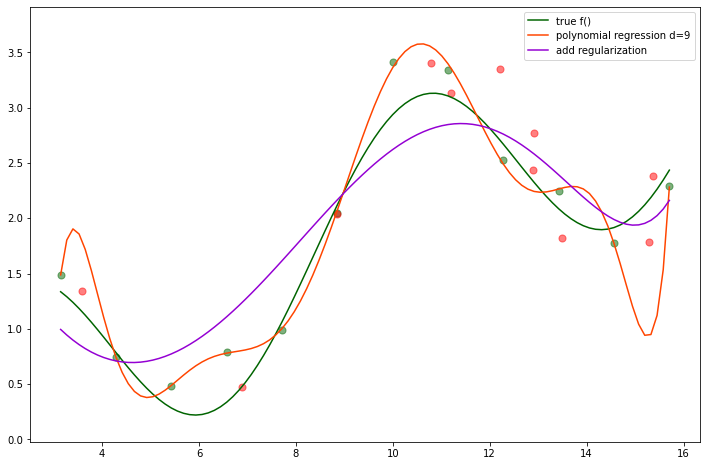

In [10]:

from sklearn.linear_model import Lasso
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
rseed = 42
rng = np.random.RandomState(rseed)
x_train = np.linspace(x_low, x_high, N)
y_train = true_f(x_train) + noise_sigma * rng.randn(N)

rseed = 13
rng = np.random.RandomState(rseed)
x_test = x_low + rng.rand(N) * x_del
y_test = true_f(x_test) + noise_sigma * rng.randn(N)

alpha_val = 1e-7

lasso_model = make_pipeline(PolynomialFeatures(degree), 
                            Lasso(alpha=alpha_val, normalize=True))

lasso_model.fit(x_train[:, np.newaxis], y_train)

yfit_train = lr_model.predict(x_train[:, np.newaxis])
yfit_test  = lr_model.predict(x_test[:, np.newaxis])

yfit_train_reg = lasso_model.predict(x_train[:, np.newaxis])
yfit_test_reg  = lasso_model.predict(x_test[:, np.newaxis])

rmse_train = mean_squared_error(y_train, yfit_train, squared=False)
rmse_train_reg = mean_squared_error(y_train, yfit_train_reg, squared=False)
print(f'\nTraining RMSE for Polynomial Regression: {rmse_train:6.3f}')
print(f'Training RMSE for Regularized Polynomial Regression: {rmse_train_reg:6.3f}')

rmse_test = mean_squared_error(y_test, yfit_test, squared=False)
rmse_test_reg = mean_squared_error(y_test, yfit_test_reg, squared=False)
print(f'\nTesting  RMSE for Polynomial Regression: {rmse_test:6.3f}')
print(f'Testing  RMSE for Regularized Polynomial Regression: {rmse_test_reg:6.3f}')

xfit_100 = np.linspace(x_low, x_high, 100)
yfit_100 = lr_model.predict(xfit_100[:, np.newaxis])
yfit_100_reg = lasso_model.predict(xfit_100[:, np.newaxis])

plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.5, color='darkgreen', s=50)
plt.scatter(x_test, y_test, alpha=0.5, color='red', s = 50)
plt.ylim(np.min(y_train)-0.5, np.max(y_train)+0.5)
plt.plot(xfit_100, true_f(xfit_100), label = 'true f()', color='darkgreen');
plt.plot(xfit_100, yfit_100, label = 'polynomial regression d=9', color='orangered');
plt.plot(xfit_100, yfit_100_reg, label = 'add regularization', color='darkviolet');
plt.legend()
pass

The Lasso model behaves very differently than the ridge regression model in that it is very **sparse**:  most of the parameters are essentially zero as we can see next in this comparison of ridge versus lasso coeficients:

In [11]:
lasso_coefs = lasso_model.get_params()['lasso'].coef_ 
ridge_coefs.shape
for i in range(len(lasso_coefs)) :
    print(f'Coefficients {i} for ridge --- lasso  \t {ridge_coefs[i]:16.12f} --- {lasso_coefs[i]:16.12f}')

Coefficients 0 for ridge --- lasso  	   0.000000000000 ---   0.000000000000
Coefficients 1 for ridge --- lasso  	   2.165415528784 ---  -1.458736442768
Coefficients 2 for ridge --- lasso  	  -0.875714006440 ---   0.170970689596
Coefficients 3 for ridge --- lasso  	   0.091347683398 ---   0.000074815382
Coefficients 4 for ridge --- lasso  	   0.001424052486 ---  -0.000224867127
Coefficients 5 for ridge --- lasso  	  -0.000338542675 ---  -0.000013873915
Coefficients 6 for ridge --- lasso  	  -0.000017379795 ---  -0.000000493952
Coefficients 7 for ridge --- lasso  	   0.000000751017 ---  -0.000000003211
Coefficients 8 for ridge --- lasso  	   0.000000109668 ---   0.000000001311
Coefficients 9 for ridge --- lasso  	  -0.000000004392 ---   0.000000000154


We can also observe that lasso regularization behavior on the Breast Cancer Data Set


In [12]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X.shape
classifier = Lasso()

coefs = []
errors = []
alphas = np.logspace(-10, 1, 40)

# Train the model with different values of the regularization parameter:
for a in alphas:
    classifier.set_params(alpha=a)
    classifier.fit(X, y);
    coefs.append(classifier.coef_[3:9])
    err = mean_squared_error(y, classifier.predict(X), squared=False)
    errors.append(err)

Text(0, 0.5, 'weights')

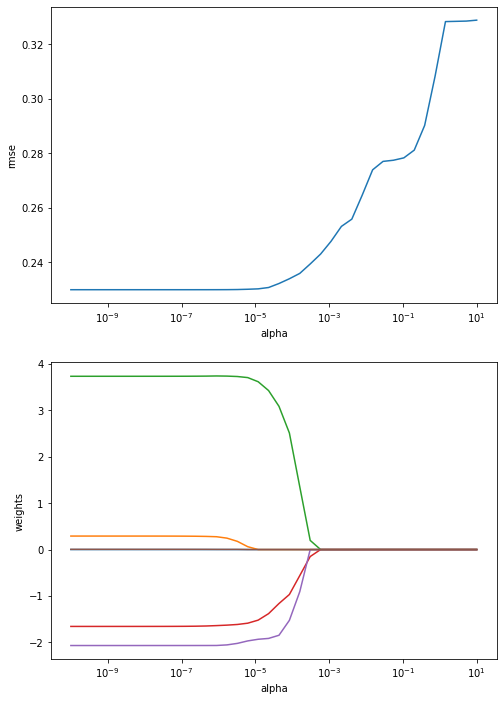

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(12)
fig.set_figwidth(8)

ax1.semilogx(alphas, errors)
ax1.set_xlabel('alpha')
ax1.set_ylabel('rmse')

ax2.semilogx(alphas, coefs)
ax2.set_xlabel('alpha')
ax2.set_ylabel('weights')

### Summary

- Instead of minimizing the loss function (e.g. mean squared error), we minimize the loss plus an additional regularization term that penalizes overfitting.
- Regularization is a "cure" for overfitting.
- A tuning parameter $\alpha$ controls the magnitude of the penalty.
- A small value of $\alpha$ has a small effect on the parameters and the resulting model is similar to a normal linear model.
- Increasing alpha penalizes the coefficients and shrinks them towards zero.
- We have seen two version of the regularizer:  $L_1$, and $L_2$.  The $L_1$ regularizer leads to sparse solutions (few nonzero coefficients).  This can be both an advantage and disadvantage.
- We have a new problem - how do we choose the regularization hyperparameter.